# Problem set 3

Run cross-sectional regressions of returns on lagged values of (i) only Signal 1, (ii) only Signal 2, (iii) both signals. Follow the approach outlined on the lecture slides and run these regressions separately for each year, save the estimated coefficients and then take the average of these estimated coefficients. What do these estimates tell you and how can you use these results for designing a trading strategy

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

In [2]:
file = 'PS_3_Exercise_XS_Regressions.xlsx'

In [3]:
# import excess returns
xrets = pd.read_excel(file, sheet_name='excess_returns', index_col='year')
xrets.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
year,,,,,,,,,,
1999,-1.200890,-0.002706,-1.618345,2.392067,4.559588,5.025696,2.243313,1.910509,0.356959,2.037739
2000,-13.778390,-3.705992,10.568176,6.882090,11.043641,4.223057,-13.479858,-3.230255,-24.132309,-2.264301
2001,10.405867,-8.496096,-16.506424,20.712764,1.587806,5.762074,1.037163,17.141244,-20.290034,-4.912387
2002,-11.296104,15.200846,-5.726030,-13.840255,0.907820,14.878071,0.601715,7.873615,-13.322315,-7.090368
2003,-13.195089,0.195082,3.927338,-9.135195,0.229435,21.435202,14.111973,-5.766736,0.213010,-13.380520


In [4]:
# import first signal
signal_1 = pd.read_excel(file, sheet_name='signal_1', index_col='year')
signal_1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
year,,,,,,,,,,
1999,5.226062,1.379757,2.305694,-0.141601,5.432593,11.091938,9.740048,10.613332,1.314855,1.453451
2000,2.241086,4.331550,2.830591,1.178240,4.796133,12.076056,9.420799,10.413668,1.989098,-0.820630
2001,2.367064,2.001189,5.381705,0.051492,3.432404,8.270845,6.737943,8.733715,1.594648,-2.408373
2002,0.490743,1.060368,3.586845,-0.912380,3.861850,11.499365,10.695381,9.567118,5.343481,2.324345
2003,4.260638,2.172856,1.685866,4.103196,4.672893,9.996212,6.193520,7.724427,0.390221,0.113872


In [5]:
# import second signal
signal_2 = pd.read_excel(file, sheet_name='signal_2', index_col='year')
signal_2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
year,,,,,,,,,,
1999,5.680274,1.283266,-2.468776,-2.229475,-2.130204,1.860085,5.038685,3.659099,7.369763,0.984621
2000,-4.089687,3.444342,6.385925,-6.162781,0.388719,0.601581,2.082883,-4.899276,6.188875,1.256856
2001,2.087487,-4.529555,3.162587,4.057460,0.688006,-2.810899,0.175637,-0.976851,4.197165,1.125268
2002,5.218544,-0.034651,-0.846066,2.610147,0.516814,-3.934440,-2.950081,3.432391,0.958255,5.268504
2003,3.438038,3.176046,2.764631,3.998904,-2.879803,2.155141,-0.898226,2.506599,5.906450,-1.886517


# Cross-sectional regressions

In [6]:
# univariate for both signals separately

In [7]:
# number of years 
T = len(xrets)
T

20

In [8]:
# empty dictionaries for betas
beta_1 = {}
beta_2 = {}

In [9]:
#regression
for t in range(1, T):
    y = xrets.iloc[t, :]
    
    # signal 1 in previous year
    x_1 = signal_1.iloc[t-1, :]
    # signal 2 in previous yera
    x_2 = signal_2.iloc[t-1, :]
    
    reg_1 = sm.OLS(y, sm.add_constant(x_1)).fit()
    reg_2 = sm.OLS(y, sm.add_constant(x_2)).fit()
    
    # update dictionaries
    year = xrets.index[t]
    beta_1.update({year: reg_1.params.iloc[1]})
    beta_2.update({year: reg_2.params.iloc[1]})

In [10]:
# create a DataFrame
uv_slopes = pd.DataFrame([beta_1, beta_2], index=["Signal 1", "Signal 2"])
uv_slopes

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Signal 1,-0.076410,0.959117,1.776937,1.904798,1.123965,-0.044922,0.567425,-0.053802,1.989705,0.315548,1.079906,-0.860403,2.040224,0.544292,0.996775,0.035388,1.273050,1.112263,0.272974
Signal 2,-3.131685,-2.985907,-3.639560,-3.482285,-3.251829,-2.650313,-3.158417,-2.887762,-3.328420,-2.726961,-3.502978,-2.796138,-2.957817,-2.937511,-3.167290,-2.466429,-3.263979,-3.248515,-2.963009


# multivariate regression

In [11]:
# create empty dictionary to store results
mv_slopes = {}

In [12]:
for t in range(1, T):
    
    #excess return of all securities in current year
    y = xrets.iloc[t,:]
    
    #signals 1 and 2 in previos year
    x = [signal_1.iloc[t-1, :], signal_2.iloc[t-1, :]]
    x = pd.concat(x, axis=1)
    x.columns = ["Signal 1", "Signal 2"]
    
    #run cross-sectional regression
    reg = sm.OLS(y, sm.add_constant(x)).fit()
    
    #update dictionary with slopy coefficients
    year = xrets.index[t]
    mv_slopes.update({year: reg.params.loc[["Signal 1", "Signal 2"]]})

In [13]:
#create pandas DataFrame
mv_slopes = pd.DataFrame(mv_slopes)
mv_slopes

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Signal 1,0.802241,0.620955,0.750355,0.634972,0.817669,0.516466,0.454035,0.682736,0.490126,0.655171,0.411805,0.437065,1.032462,0.370045,0.278630,0.685651,0.621031,0.730142,0.441804
Signal 2,-3.435562,-2.915693,-3.265571,-2.940174,-3.148360,-2.814824,-3.136894,-2.994694,-3.088658,-3.047315,-3.225462,-3.080505,-2.262127,-2.845647,-3.004571,-2.852327,-3.036253,-3.066983,-2.992002


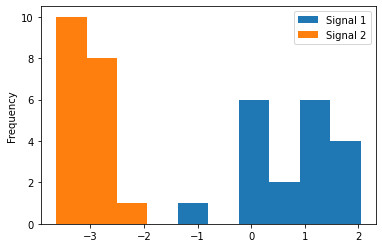

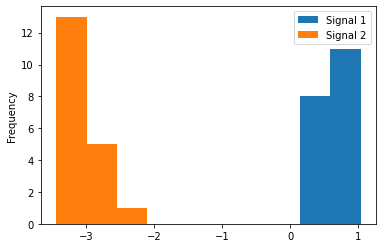

In [14]:
#histogram of distributions
uv_slopes.T.plot.hist();
mv_slopes.T.plot.hist();

# Compute times-series averages

In [15]:
print("Univariate regression slopes: ")
print(uv_slopes.mean(axis=1))

Univariate regression slopes: 
Signal 1    0.787202
Signal 2   -3.081411
dtype: float64


In [16]:
print("Multivariate regression slopes: ")
print(mv_slopes.mean(axis=1))

Multivariate regression slopes: 
Signal 1    0.601756
Signal 2   -3.008085
dtype: float64


# Time-series regression

In [31]:
# number of asset 
N = xrets.shape[1]
N

10

In [32]:
#lag signals
signal_1_lagged = signal_1.shift(1)
signal_2_lagged = signal_2.shift(1)

In [33]:
#create an emty dictionary
ts_slopes = {}

In [34]:
#loop over all securities
for n in range(N):
    # excess return of asset n
    y = xrets.iloc[:, n]
    
    #signals 1 and 2
    x = [signal_1_lagged.iloc[:, n], signal_2_lagged.iloc[:, n]]
    x = pd.concat(x, axis=1)
    x.columns = ["Signal 1", "Signal 2"]
    
    #run time-series regression
    reg = sm.OLS(y, sm.add_constant(x), missing='drop').fit()
    
    #update dictionary
    security = xrets.columns[n]
    ts_slopes.update({security: reg.params.loc[["Signal 1", "Signal 2"]]})
    

In [35]:
#create pandas DataFrame
ts_slopes = pd.DataFrame(ts_slopes)
ts_slopes

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
Signal 1,0.452821,0.622324,-0.083920,0.409183,0.456471,0.279148,0.528526,0.039739,0.286476,0.706682
Signal 2,-2.871570,-3.133996,-2.771669,-3.156310,-2.923076,-2.994112,-3.178683,-2.935207,-3.184146,-3.166479


# Cross-sectional average

In [36]:
print("Time-series regression slopes:")
print(ts_slopes.mean(axis=1))

Time-series regression slopes:
Signal 1    0.369745
Signal 2   -3.031525
dtype: float64
